### Importación de datos



In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

#Explorando los datos
print(tienda.shape)
print(tienda.head())
print(tienda.info())
print(tienda.describe())


(2359, 12)
            Producto Categoría del Producto    Precio  Costo de envío  \
0  Asistente virtual           Electrónicos  164300.0          6900.0   
1    Mesa de comedor                Muebles  192300.0          8400.0   
2      Juego de mesa               Juguetes  209600.0         15900.0   
3         Microondas      Electrodomésticos  757500.0         41000.0   
4   Silla de oficina                Muebles  335200.0         20200.0   

  Fecha de Compra         Vendedor Lugar de Compra  Calificación  \
0      16/01/2021      Pedro Gomez          Bogotá             4   
1      18/05/2022  Beatriz Morales        Medellín             1   
2      15/03/2021   Juan Fernandez       Cartagena             1   
3      03/05/2022   Juan Fernandez            Cali             4   
4      07/11/2020    Maria Alfonso        Medellín             5   

       Método de pago  Cantidad de cuotas       lat       lon  
0  Tarjeta de crédito                   8   4.60971 -74.08175  
1  Tarjeta de

# Limpieza de datos 
### Se cambiara el tipo de dato de la columna "Fecha de Compra" a formato datetime

In [43]:
tienda["Fecha de Compra"] = pd.to_datetime(tienda["Fecha de Compra"], format="%d/%m/%Y")
tienda2["Fecha de Compra"] = pd.to_datetime(tienda["Fecha de Compra"], format="%d/%m/%Y")
tienda3["Fecha de Compra"] = pd.to_datetime(tienda["Fecha de Compra"], format="%d/%m/%Y")
tienda4["Fecha de Compra"] = pd.to_datetime(tienda["Fecha de Compra"], format="%d/%m/%Y")

# 1. Análisis de facturación



## Ingresos totales

### Ventas tomando en consideracion solamente la columna precio

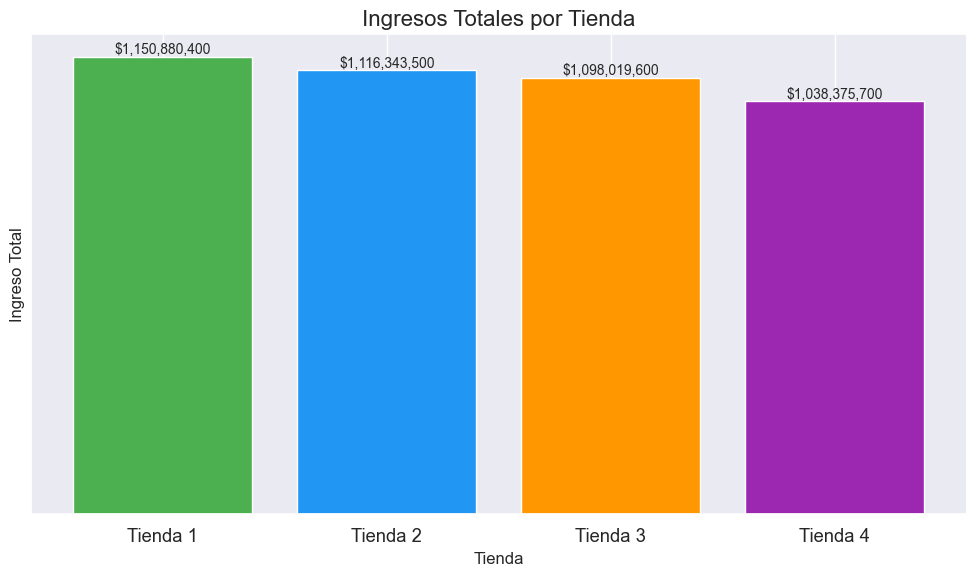

In [158]:
def precio_total(tienda): 
    return tienda["Precio"].sum()

ingreso_precio_tienda1 = precio_total(tienda)
ingreso_precio_tienda2 = precio_total(tienda2)
ingreso_precio_tienda3 = precio_total(tienda3)
ingreso_precio_tienda4 = precio_total(tienda4)

ingreso_precio = {
    "Tienda 1": ingreso_precio_tienda1,
    "Tienda 2": ingreso_precio_tienda2,
    "Tienda 3": ingreso_precio_tienda3,
    "Tienda 4": ingreso_precio_tienda4
}

# Graficando los ingresos totales por tienda
plt.figure(figsize=(10, 6))
bars = plt.bar(ingreso_precio.keys(), ingreso_precio.values(), color=['#4CAF50', '#2196F3', '#FF9800', '#9C27B0'])

plt.title('Ingresos Totales por Tienda', fontsize=16)
plt.xlabel('Tienda', fontsize=12)
plt.ylabel('Ingreso Total', fontsize=12)
plt.gca().set_yticks([])


# Añadir etiquetas de datos encima de las barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 500, f"${height:,.0f}", 
             ha='center', va='bottom', fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



### Ganancias totales

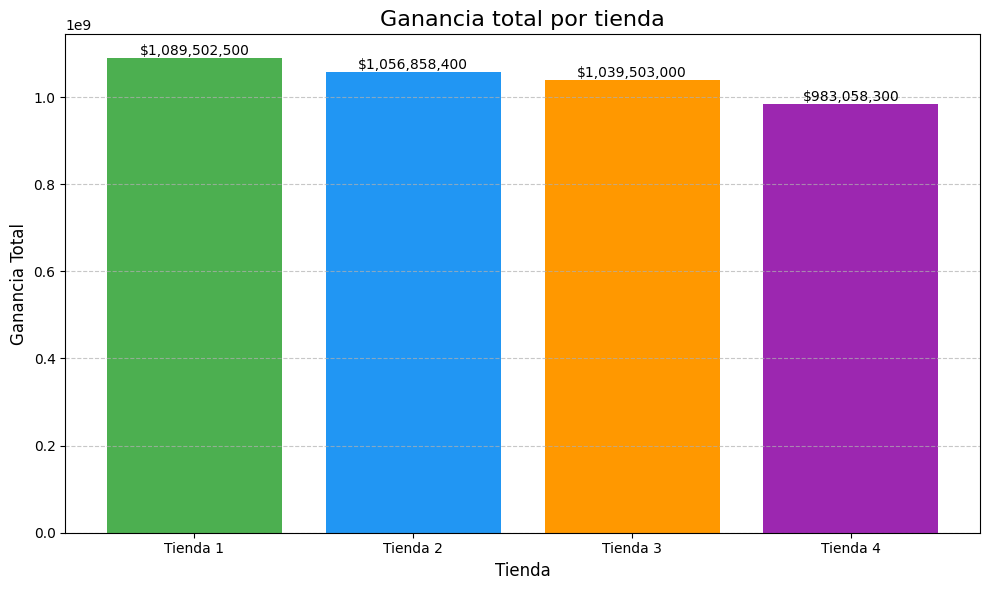

In [ ]:
def ganancia_precio_total(tienda): 
    ingreso = tienda["Precio"].sum()
    costo_envio = tienda["Costo de envío"].sum()
    return ingreso - costo_envio

ganancia_precio_tienda1 = ganancia_precio_total(tienda)
ganancia_precio_tienda2 = ganancia_precio_total(tienda2)
ganancia_precio_tienda3 = ganancia_precio_total(tienda3)
ganancia_precio_tienda4 = ganancia_precio_total(tienda4)

ganancia_precio = {
    "Tienda 1": ganancia_precio_tienda1,
    "Tienda 2": ganancia_precio_tienda2,
    "Tienda 3": ganancia_precio_tienda3,
    "Tienda 4": ganancia_precio_tienda4
}


plt.figure(figsize=(10, 6))
bars = plt.bar(ganancia_precio.keys(), ganancia_precio.values(), color=['#4CAF50', '#2196F3', '#FF9800', '#9C27B0'])

plt.title('Ganancia total por tienda', fontsize=16)
plt.xlabel('Tienda', fontsize=12)
plt.ylabel('Ganancia Total', fontsize=12)
plt.gca().set_yticks([])


# Añadir etiquetas de datos encima de las barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 500, f"${height:,.0f}", 
             ha='center', va='bottom', fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 2. Ventas por categoría

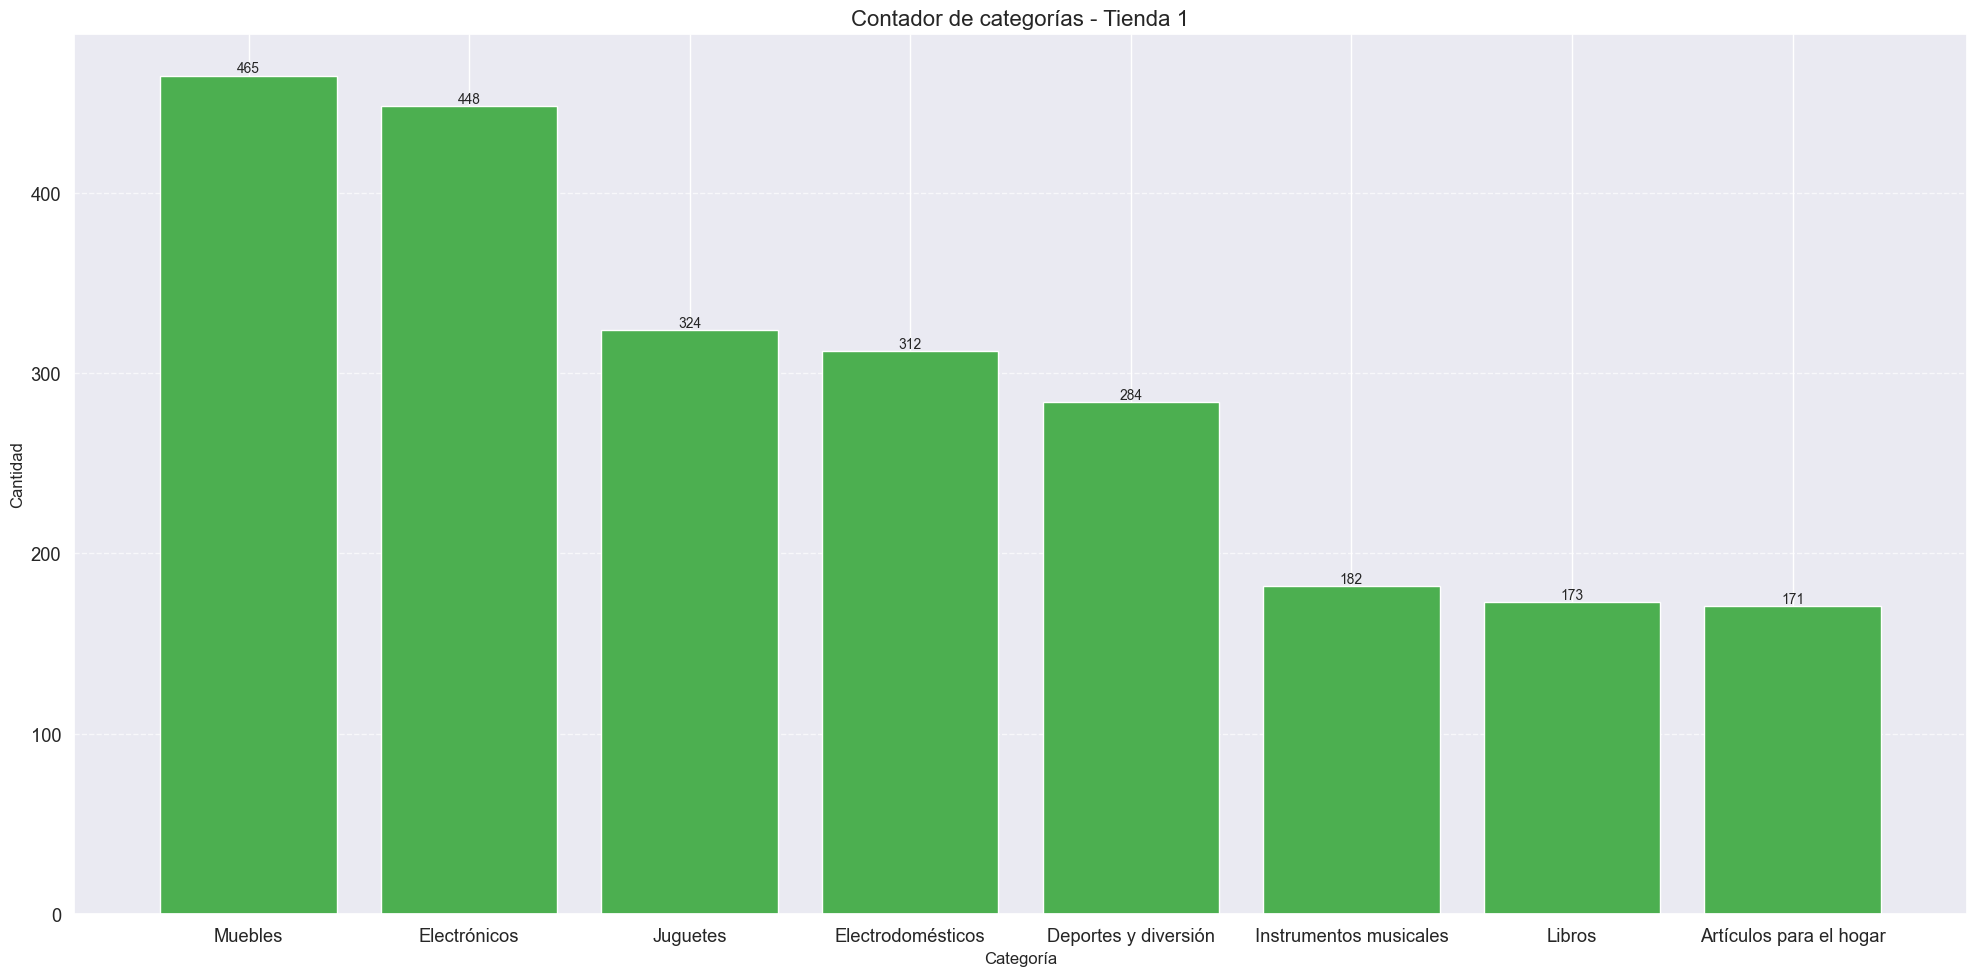

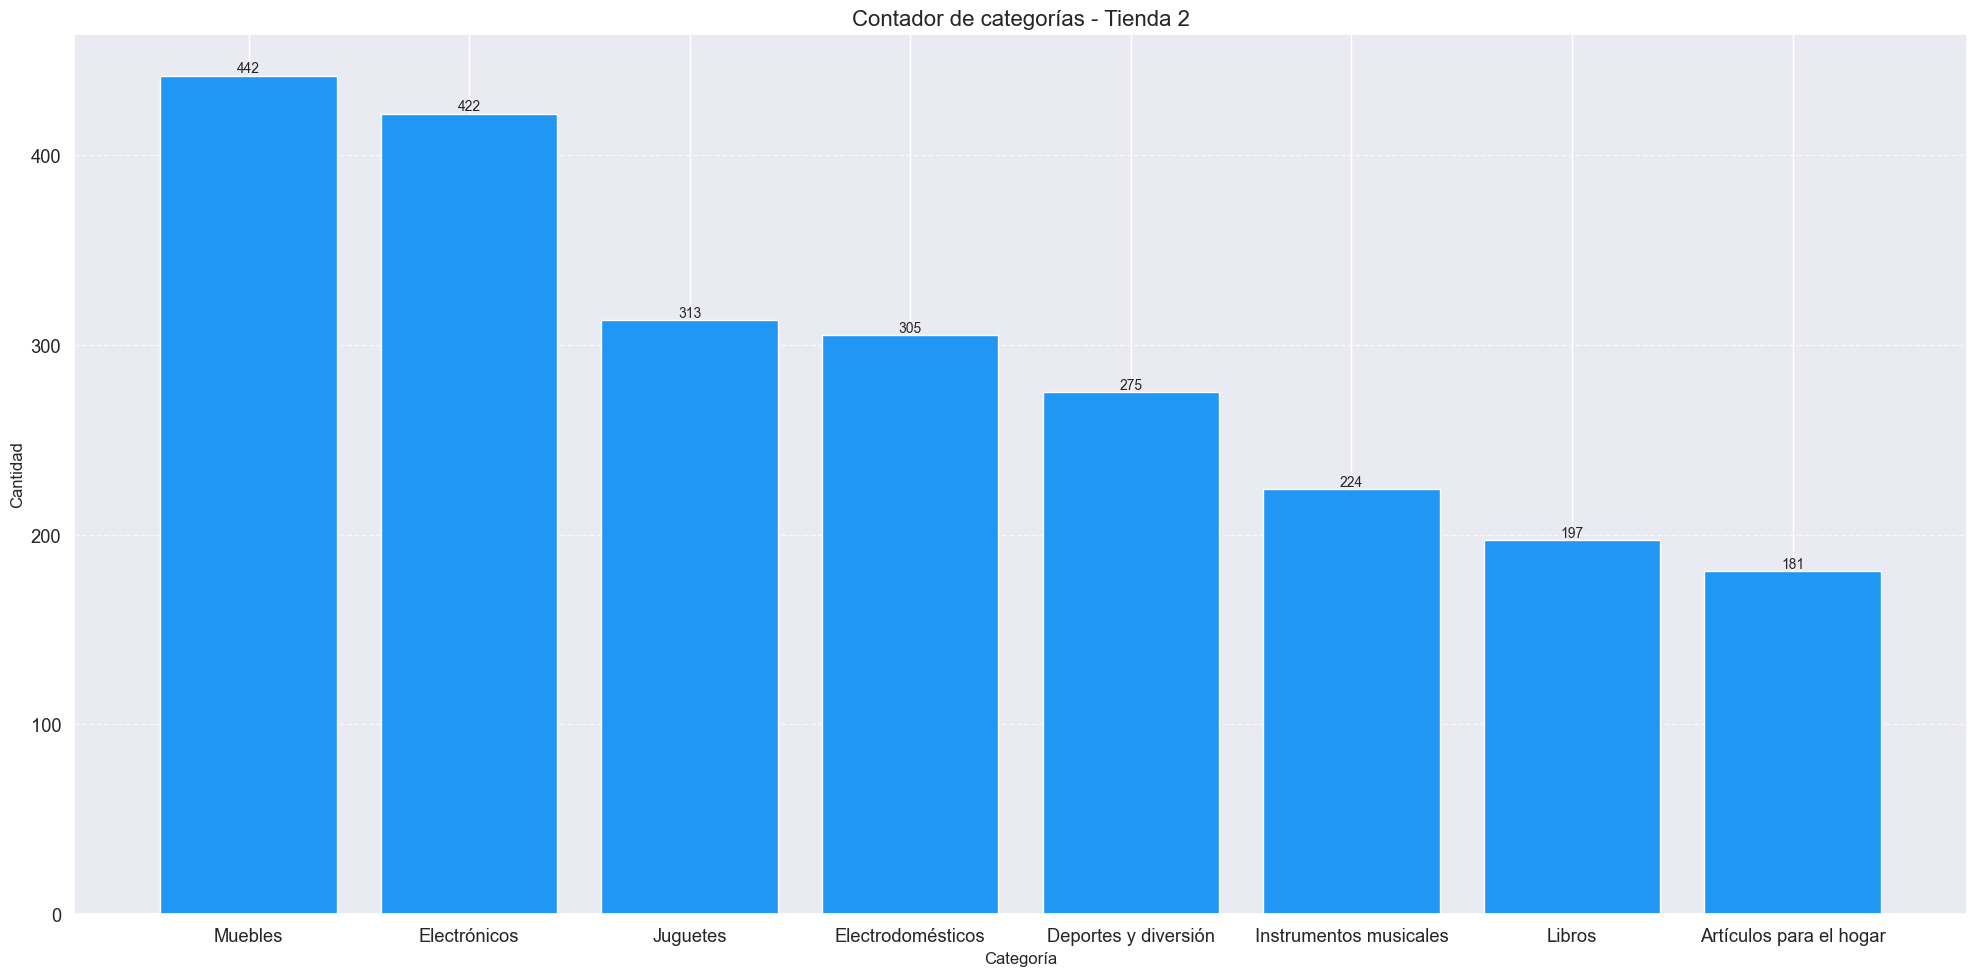

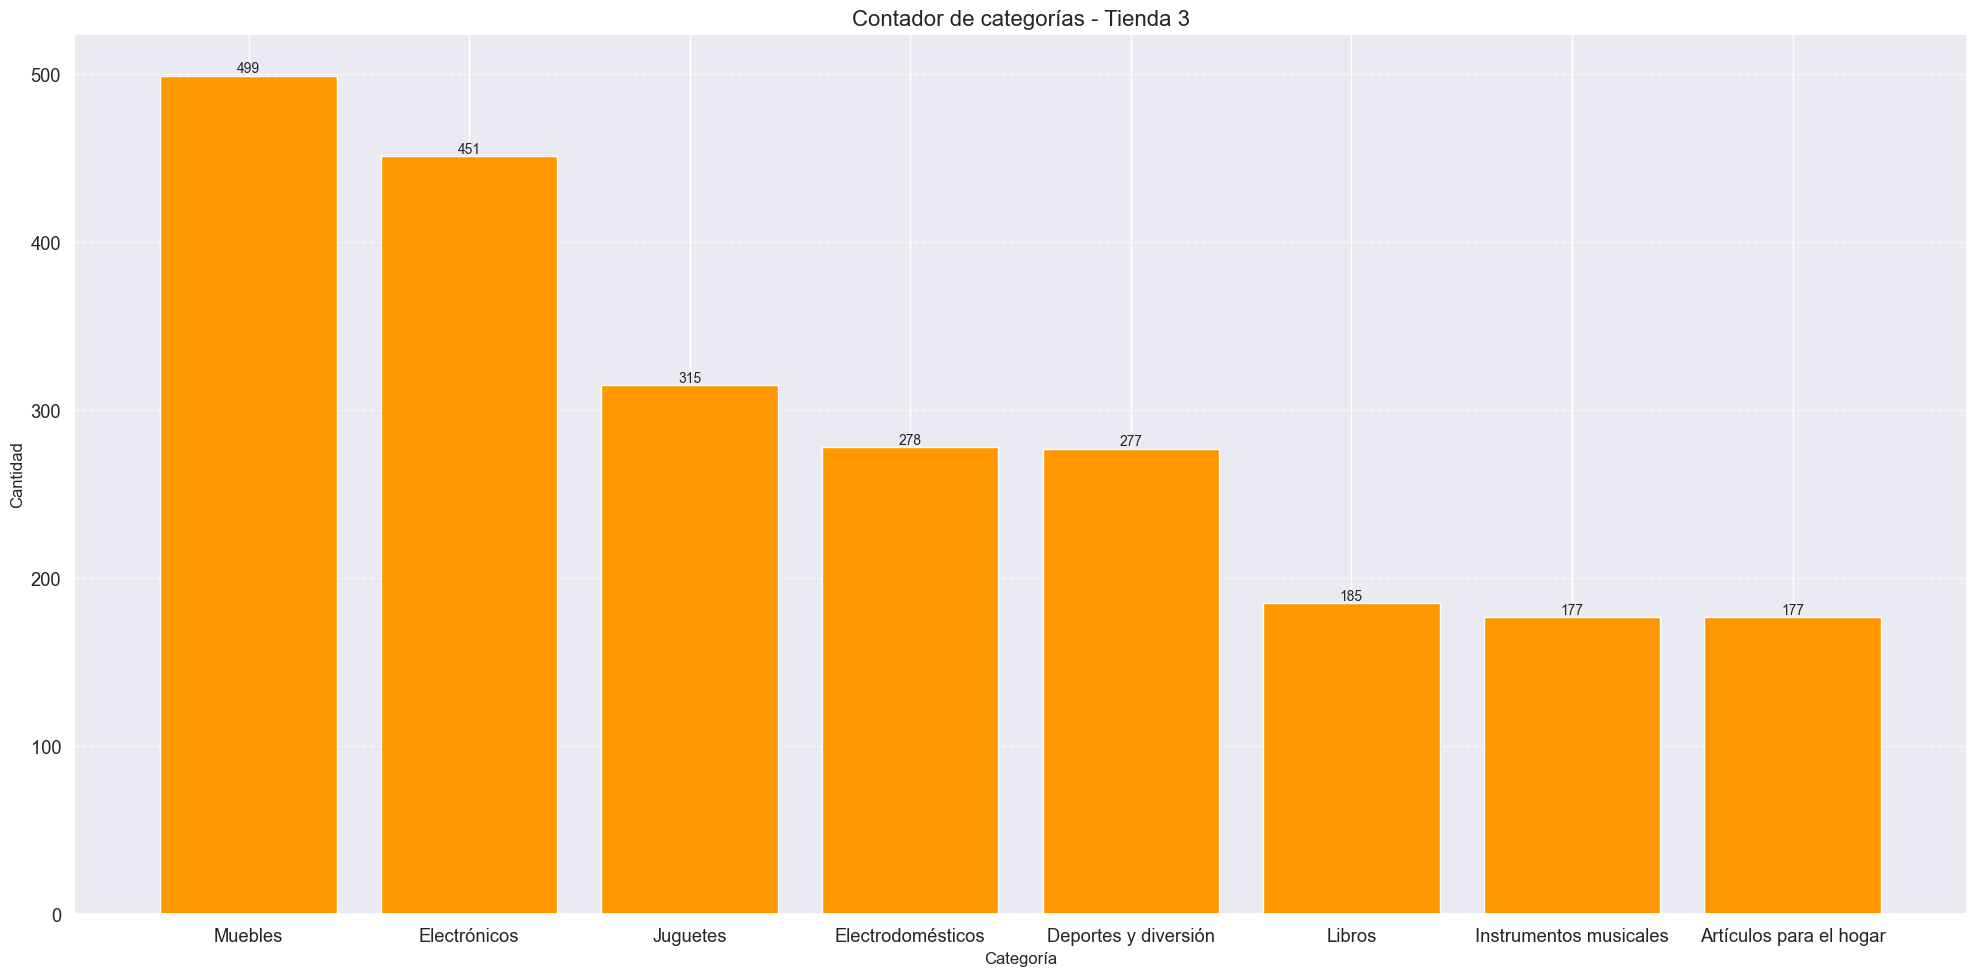

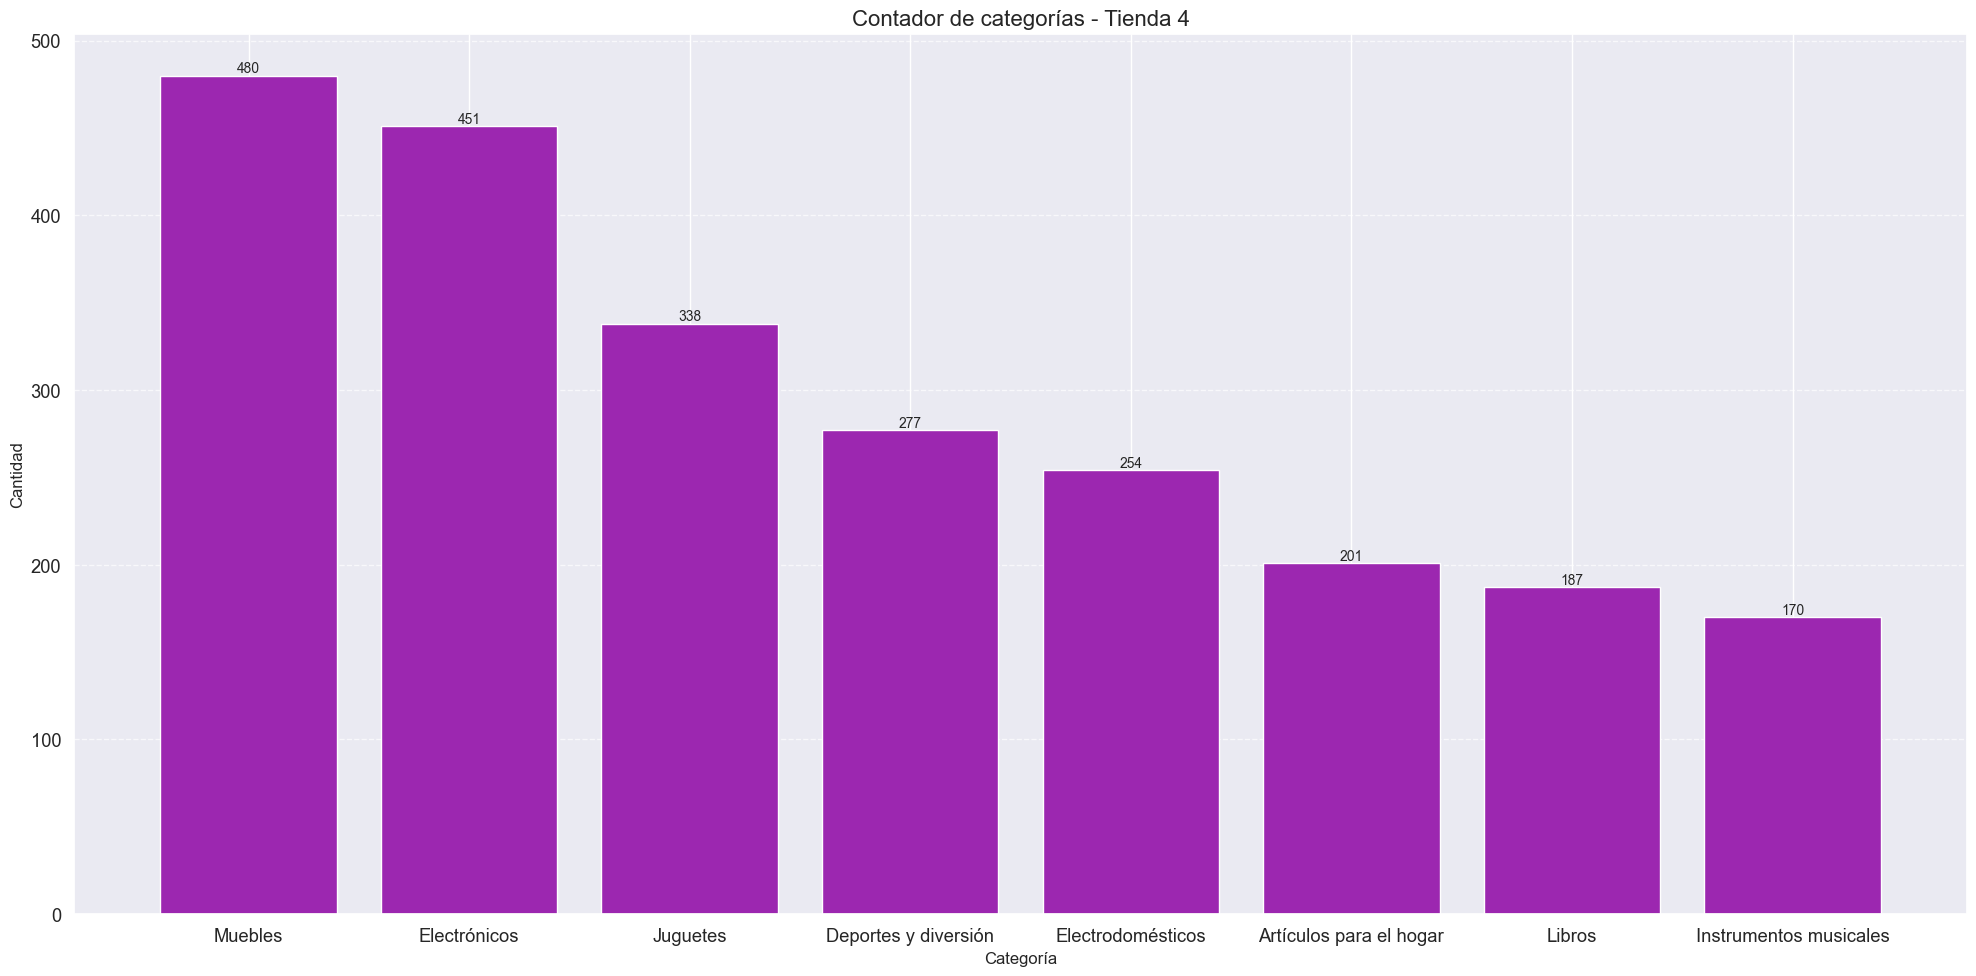

In [ ]:
def contador_de_categorias(tienda):  
    contador = tienda["Categoría del Producto"].value_counts()
    return contador

contador_tienda1 = contador_de_categorias(tienda)
contador_tienda2 = contador_de_categorias(tienda2)
contador_tienda3 = contador_de_categorias(tienda3)
contador_tienda4 = contador_de_categorias(tienda4)



def graficar_contador_tienda(tienda, contador_tienda, color):
    plt.figure(figsize=(20, 10))
    bars = plt.bar(contador_tienda.index, contador_tienda.values, color=color)

    plt.title(f'Contador de categorías - {tienda}', fontsize=16)
    plt.xlabel('Categoría', fontsize=12)
    plt.ylabel('Cantidad', fontsize=12)
    plt.gca().set_yticks([])


    # Añadir etiquetas de datos encima de las barras
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height , f"{height:,.0f}", 
                 ha='center', va='bottom', fontsize=10)

    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

graficar_contador_tienda("Tienda 1", contador_tienda1, "#4CAF50")
graficar_contador_tienda("Tienda 2", contador_tienda2, "#2196F3")
graficar_contador_tienda("Tienda 3", contador_tienda3, "#FF9800")
graficar_contador_tienda("Tienda 4", contador_tienda4, "#9C27B0")




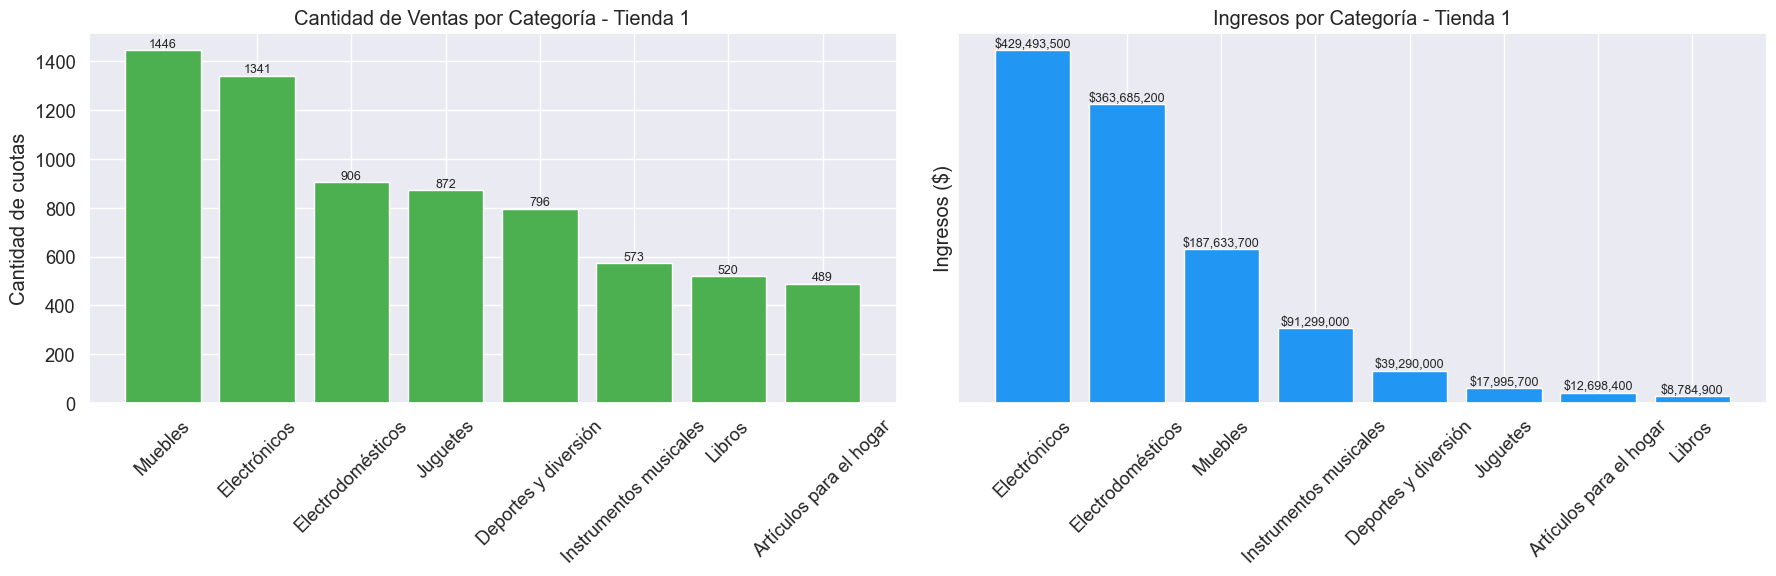

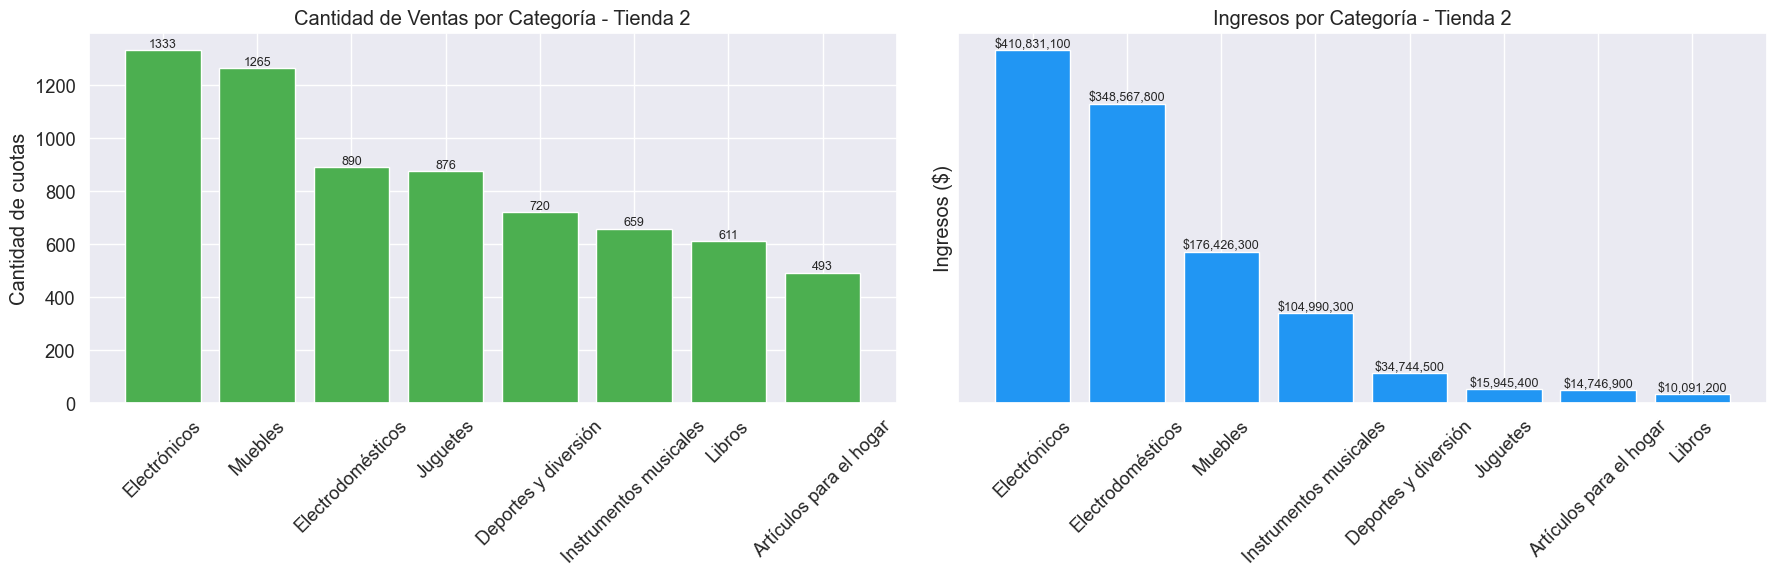

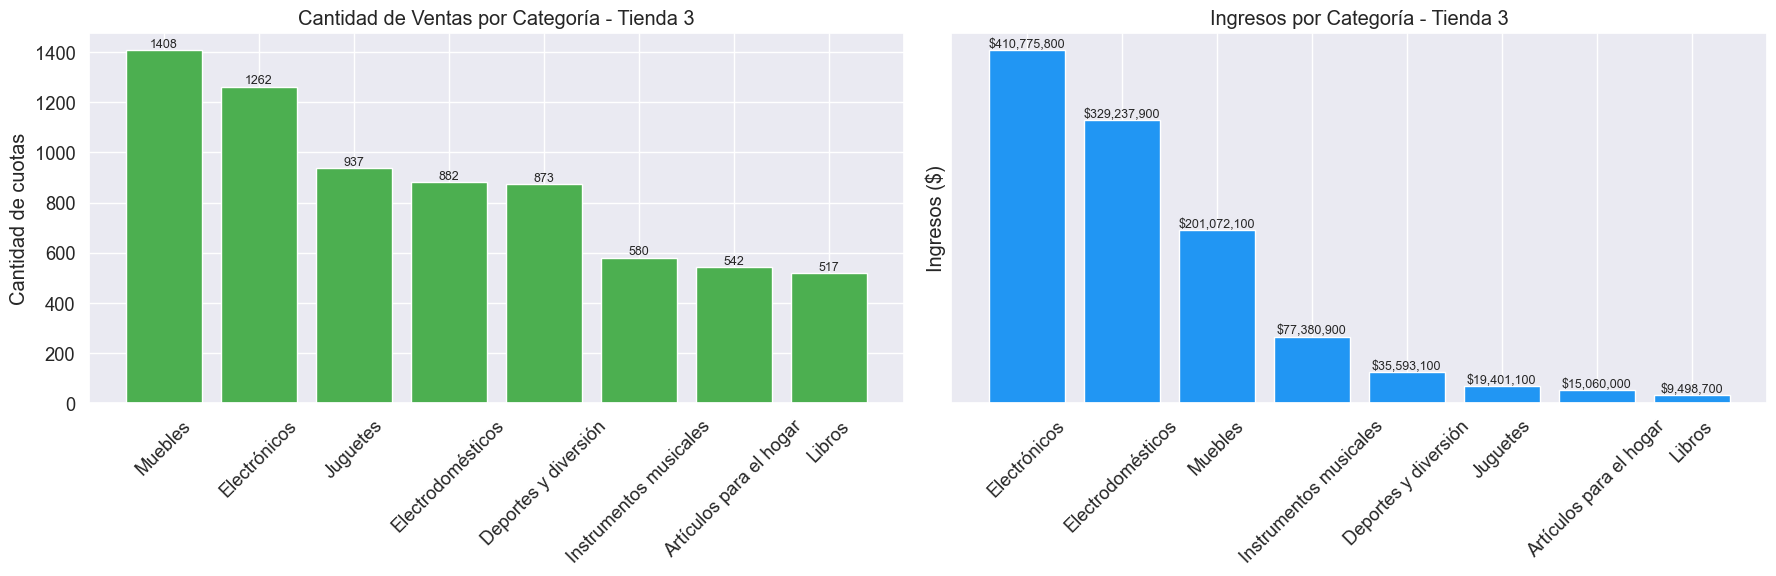

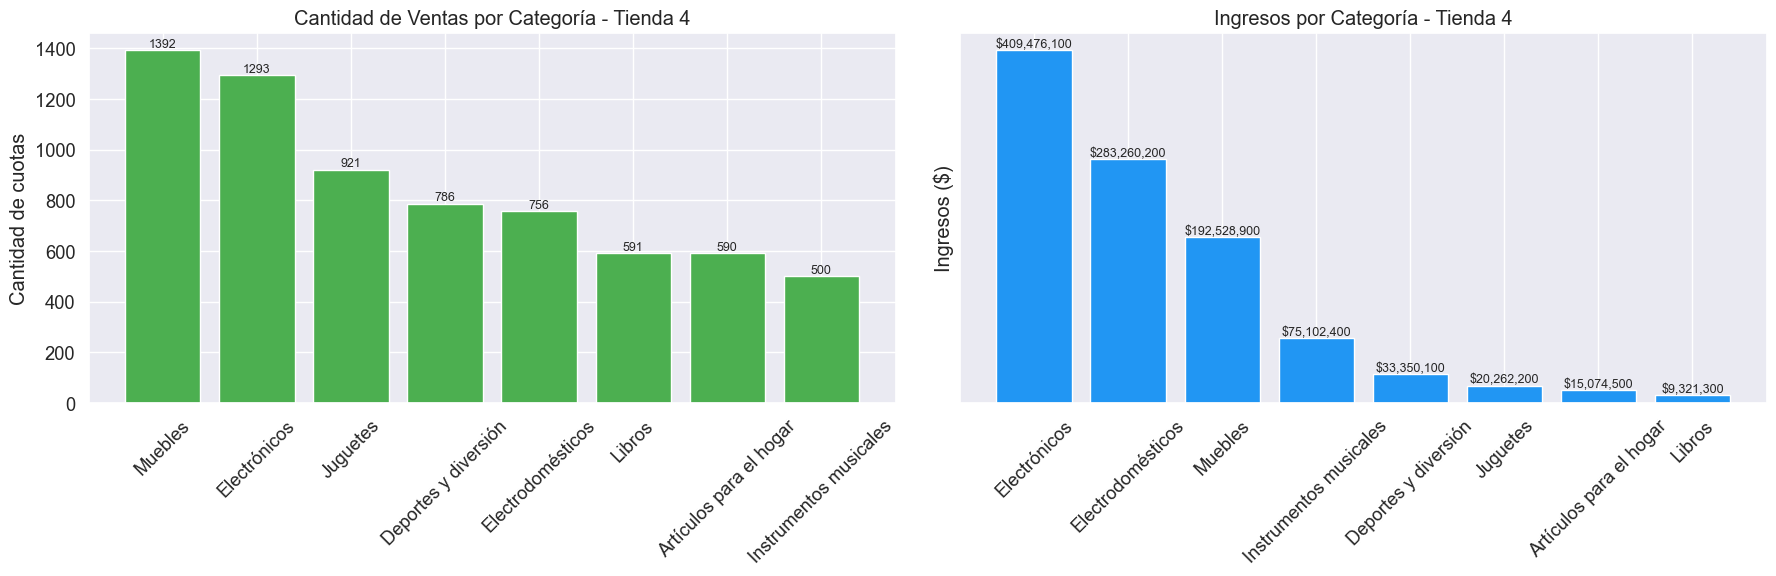

In [ ]:
def numero_ventas_categoria(tienda): 
    agrupacion_categoria = tienda.groupby("Categoría del Producto")[["Cantidad de cuotas", "Precio"]].sum().sort_values(by="Cantidad de cuotas", ascending=False)
    return agrupacion_categoria

ventas_categoria_tienda1 = numero_ventas_categoria(tienda)
ventas_categoria_tienda2 = numero_ventas_categoria(tienda2)
ventas_categoria_tienda3 = numero_ventas_categoria(tienda3)
ventas_categoria_tienda4 = numero_ventas_categoria(tienda4)

ventas_categoria = {
    "Tienda 1": ventas_categoria_tienda1,
    "Tienda 2": ventas_categoria_tienda2,
    "Tienda 3": ventas_categoria_tienda3,
    "Tienda 4": ventas_categoria_tienda4
}



def graficar_categoria_tienda(nombre_tienda, df_categoria):
    # Ordenar por cantidad de cuotas para el primer gráfico
    cuotas_ordenado = df_categoria.sort_values(by="Cantidad de cuotas", ascending=False)
    categorias_cuotas = cuotas_ordenado.index
    cantidades = cuotas_ordenado["Cantidad de cuotas"]

    # Ordenar por ingresos para el segundo gráfico
    ingresos_ordenado = df_categoria.sort_values(by="Precio", ascending=False)
    categorias_ingresos = ingresos_ordenado.index
    ingresos = ingresos_ordenado["Precio"]

    fig, axes = plt.subplots(1, 2, figsize=(18, 6))
    

    # Gráfico 1: Cantidad de cuotas
    bars1 = axes[0].bar(categorias_cuotas, cantidades, color='#4CAF50')
    axes[0].set_title(f'Cantidad de Ventas por Categoría - {nombre_tienda}')
    axes[0].set_ylabel('Cantidad de cuotas')
    axes[0].tick_params(axis='x', rotation=45)

    for bar in bars1:
        height = bar.get_height()
        axes[0].text(bar.get_x() + bar.get_width()/2, height + 0.5, f"{int(height)}", 
                     ha='center', va='bottom', fontsize=9)

    # Gráfico 2: Ingresos por categoría
    bars2 = axes[1].bar(categorias_ingresos, ingresos, color='#2196F3')
    axes[1].set_title(f'Ingresos por Categoría - {nombre_tienda}')
    axes[1].set_ylabel('Ingresos ($)')
    axes[1].tick_params(axis='x', rotation=45)
    plt.gca().set_yticks([])


    for bar in bars2:
        height = bar.get_height()
        axes[1].text(bar.get_x() + bar.get_width()/2, height + 100, f"${height:,.0f}", 
                     ha='center', va='bottom', fontsize=9)
    
    plt.tight_layout()
    plt.show()

graficar_categoria_tienda("Tienda 1", ventas_categoria["Tienda 1"])
graficar_categoria_tienda("Tienda 2", ventas_categoria["Tienda 2"])
graficar_categoria_tienda("Tienda 3", ventas_categoria["Tienda 3"])
graficar_categoria_tienda("Tienda 4", ventas_categoria["Tienda 4"])


# 3. Calificación promedio de la tienda


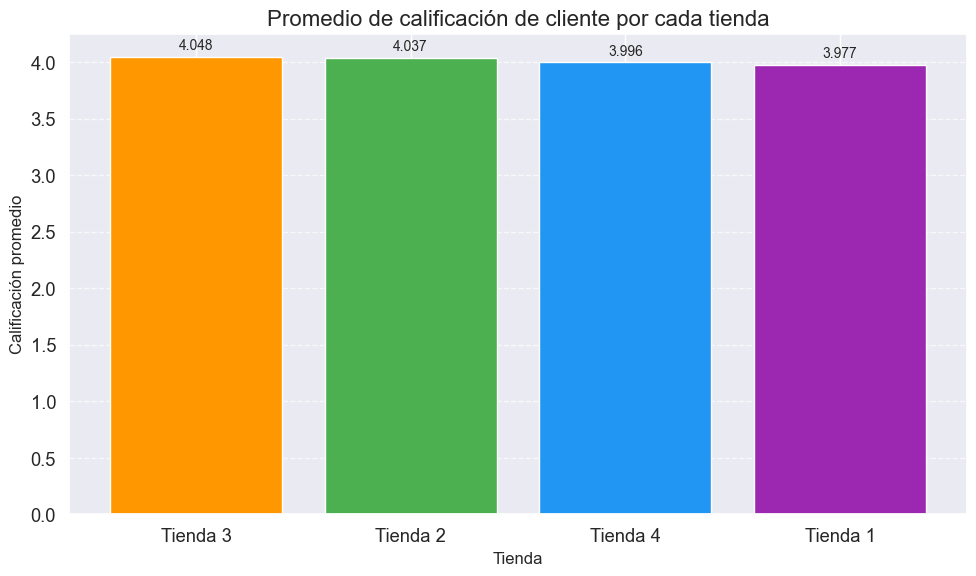

In [ ]:
def promedio_satisfaccion_tienda(tienda): 
    return tienda["Calificación"].mean()

promedio_satisfaccion_tienda1 = promedio_satisfaccion_tienda(tienda)
promedio_satisfaccion_tienda2 = promedio_satisfaccion_tienda(tienda2)
promedio_satisfaccion_tienda3 = promedio_satisfaccion_tienda(tienda3)
promedio_satisfaccion_tienda4 = promedio_satisfaccion_tienda(tienda4)

promedio_satisfaccion = {
    "Tienda 1": promedio_satisfaccion_tienda1,
    "Tienda 2": promedio_satisfaccion_tienda2,
    "Tienda 3": promedio_satisfaccion_tienda3,
    "Tienda 4": promedio_satisfaccion_tienda4
}

promedio_satisfaccion = dict(sorted(promedio_satisfaccion.items(), key=lambda item: item[1], reverse=True))

plt.figure(figsize=(10, 6))
bars = plt.bar(promedio_satisfaccion.keys(), promedio_satisfaccion.values(),
               color=['#FF9800', '#4CAF50', '#2196F3', '#9C27B0'])

plt.title('Promedio de calificación de cliente por cada tienda', fontsize=16)
plt.xlabel('Tienda', fontsize=12)
plt.ylabel('Calificación promedio', fontsize=12)
plt.gca().set_yticks([])


# Añadir etiquetas de datos encima de las barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + height * 0.01, f"{height:,.3f}",
             ha='center', va='bottom', fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# 4. Productos más y menos vendidos

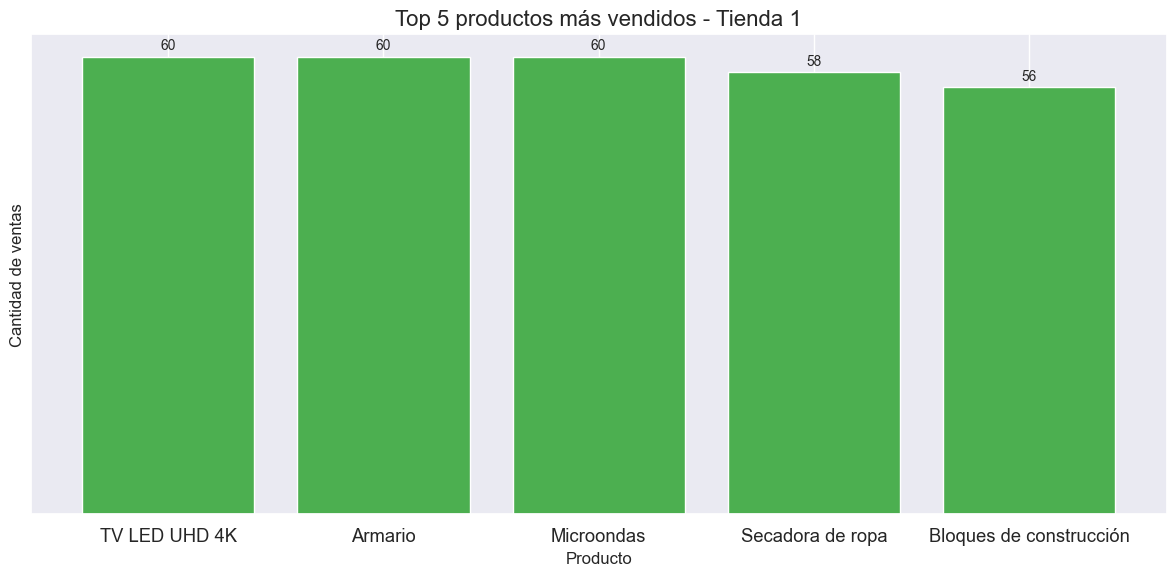

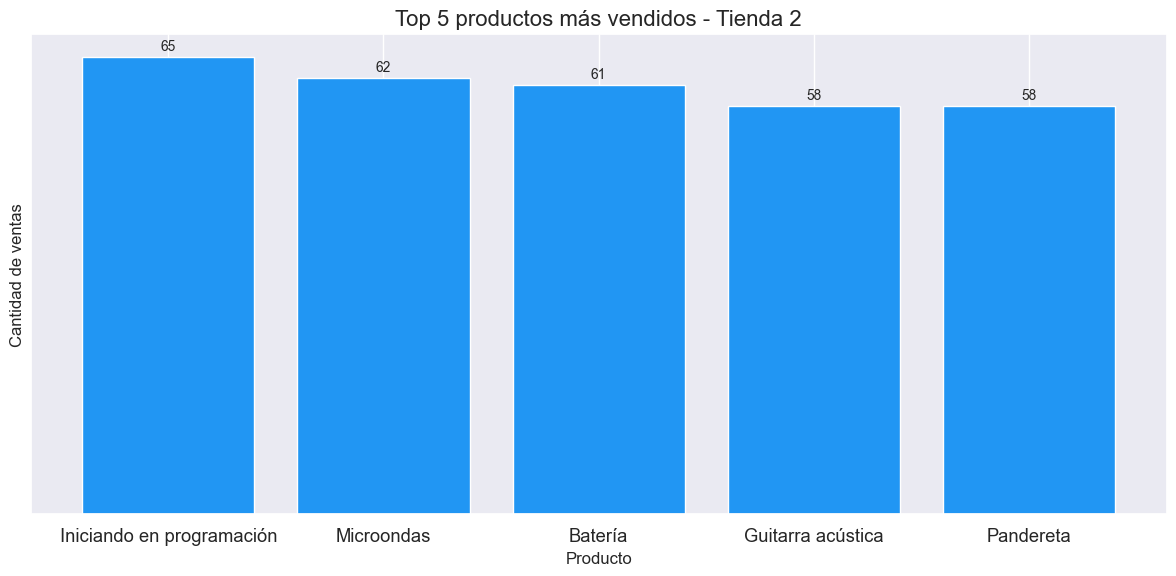

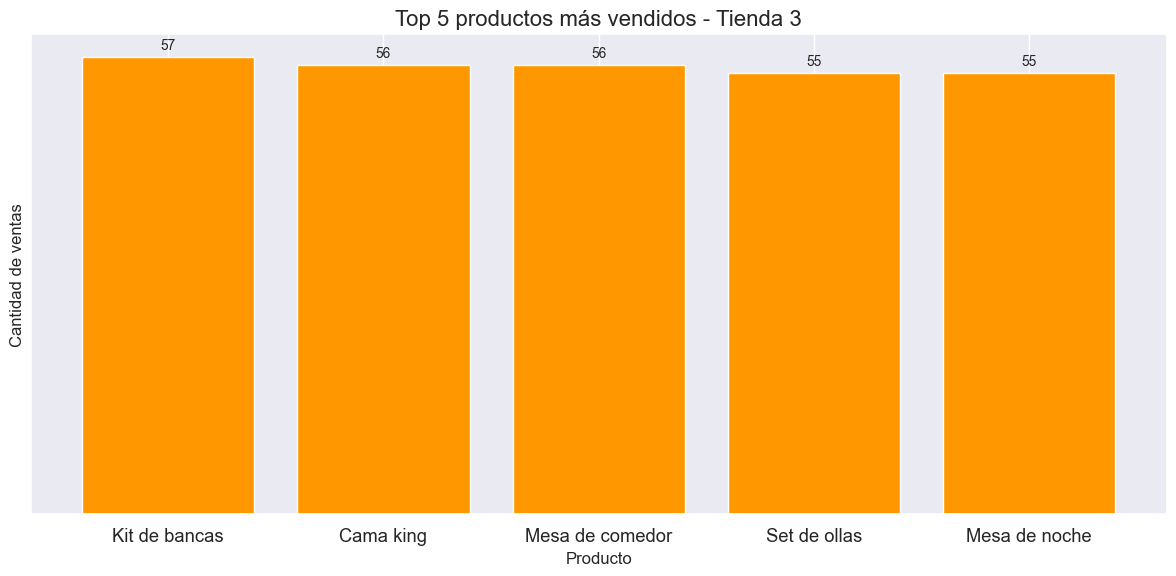

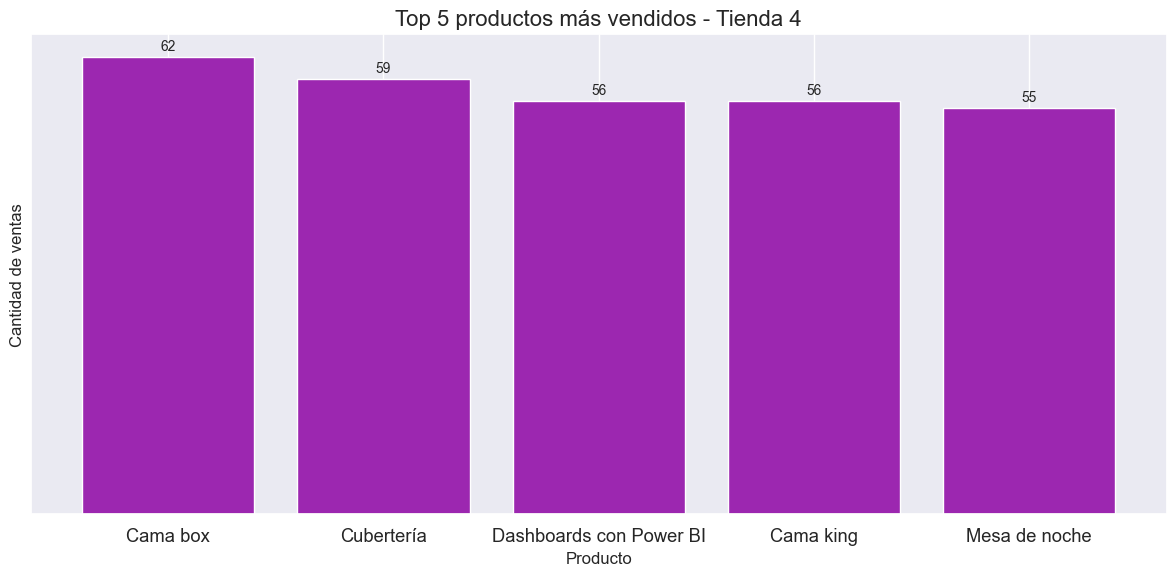

In [165]:
def top5_productos(tienda): 
    return tienda["Producto"].value_counts().head(5)
def top5_peores_productos(tienda): 
    return tienda["Producto"].value_counts(ascending=False).tail(5)

top5_tienda1 = top5_productos(tienda)
top5_tienda2 = top5_productos(tienda2)
top5_tienda3 = top5_productos(tienda3)
top5_tienda4 = top5_productos(tienda4)

top5_peores_tienda1 = top5_peores_productos(tienda)
top5_peores_tienda2 = top5_peores_productos(tienda2)
top5_peores_tienda3 = top5_peores_productos(tienda3)
top5_peores_tienda4 = top5_peores_productos(tienda4)


def graficar_top5_productos(tienda, top5, color):
    plt.figure(figsize=(12, 6))
    bars = plt.bar(top5.index, top5.values, color=color)

    plt.title(f'Top 5 productos más vendidos - {tienda}', fontsize=16)
    plt.xlabel('Producto', fontsize=12)
    plt.ylabel('Cantidad de ventas', fontsize=12)
    plt.gca().set_yticks([])


    # Añadir etiquetas de datos encima de las barras
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height + 0.5, f"{int(height)}", 
                 ha='center', va='bottom', fontsize=10)

    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

graficar_top5_productos("Tienda 1", top5_tienda1, "#4CAF50")
graficar_top5_productos("Tienda 2", top5_tienda2, "#2196F3")
graficar_top5_productos("Tienda 3", top5_tienda3, "#FF9800")
graficar_top5_productos("Tienda 4", top5_tienda4, "#9C27B0")


# 5. Envío promedio por tienda

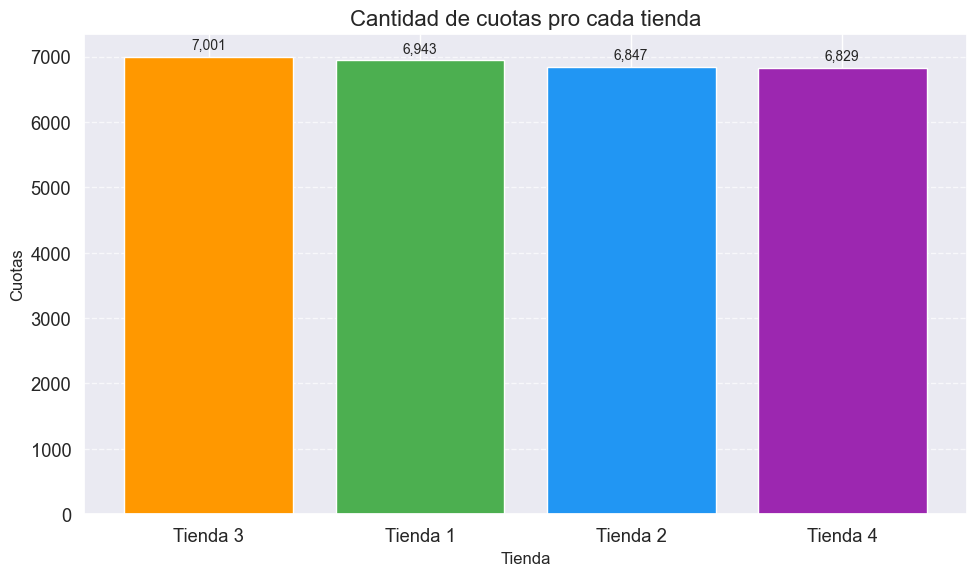

In [ ]:
def cantidad_cuotas_tienda(tienda): 
    return tienda["Cantidad de cuotas"].sum()

cantidad_cuotas_tienda1 = cantidad_cuotas_tienda(tienda)
cantidad_cuotas_tienda2 = cantidad_cuotas_tienda(tienda2)
cantidad_cuotas_tienda3 = cantidad_cuotas_tienda(tienda3)
cantidad_cuotas_tienda4 = cantidad_cuotas_tienda(tienda4)

cantidad_cuotas = {
    "Tienda 1": cantidad_cuotas_tienda1,
    "Tienda 2": cantidad_cuotas_tienda2,
    "Tienda 3": cantidad_cuotas_tienda3,
    "Tienda 4": cantidad_cuotas_tienda4
}

cantidad_cuotas = dict(sorted(cantidad_cuotas.items(), key=lambda item: item[1], reverse=True))

plt.figure(figsize=(10, 6))
bars = plt.bar(cantidad_cuotas.keys(), cantidad_cuotas.values(),
               color=['#FF9800', '#4CAF50', '#2196F3', '#9C27B0'])

plt.title('Cantidad de cuotas por cada tienda', fontsize=16)
plt.xlabel('Tienda', fontsize=12)
plt.ylabel('Cuotas', fontsize=12)
plt.gca().set_yticks([])

# Añadir etiquetas de datos encima de las barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + height * 0.01, f"{height:,.0f}",
             ha='center', va='bottom', fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


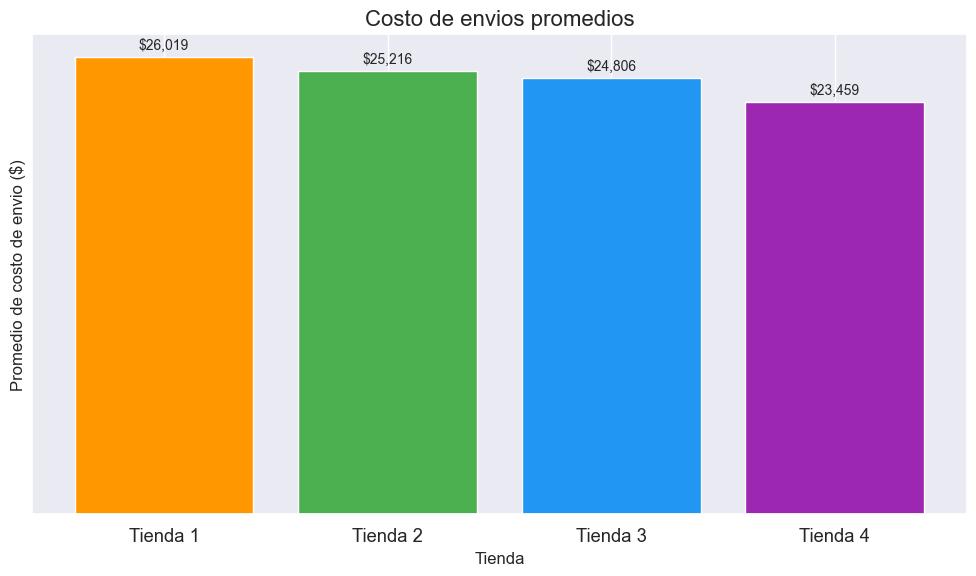

In [155]:
def cantidad_costo_envio(tienda): 
    return tienda["Costo de envío"].mean()

cantidad_costo_envio_tienda1 = cantidad_costo_envio(tienda)
cantidad_costo_envio_tienda2 = cantidad_costo_envio(tienda2)
cantidad_costo_envio_tienda3 = cantidad_costo_envio(tienda3)
cantidad_costo_envio_tienda4 = cantidad_costo_envio(tienda4)

cantidad_costo_envio = {
    "Tienda 1": cantidad_costo_envio_tienda1,
    "Tienda 2": cantidad_costo_envio_tienda2,
    "Tienda 3": cantidad_costo_envio_tienda3,
    "Tienda 4": cantidad_costo_envio_tienda4
}

plt.figure(figsize=(10, 6))
bars = plt.bar(cantidad_costo_envio.keys(), cantidad_costo_envio.values(),
               color=['#FF9800', '#4CAF50', '#2196F3', '#9C27B0'])

plt.title('Costo de envios promedios', fontsize=16)
plt.xlabel('Tienda', fontsize=12)
plt.ylabel('Promedio de costo de envio ($)', fontsize=12)
plt.gca().set_yticks([])



# Añadir etiquetas de datos encima de las barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + height * 0.01, f"${height:,.0f}",
             ha='center', va='bottom', fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
